# 🌞 Solar Data Analysis – Benin Dataset

This notebook performs **data cleaning, analysis, and visualization** of Benin's solar dataset — part of the *Solar Challenge Week 1*.

##  Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from windrose import WindroseAxes

# --- Initial Setup for Plots ---

In [5]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)

## Load Data

In [7]:
df = pd.read_csv('../data/benin-malanville.csv')
print("Data Loaded Successfully. Shape:", df.shape)
df.head()

Data Loaded Successfully. Shape: (525600, 19)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [8]:
print("An overview of the dataset: the first 10 rows")
df.head(10)

An overview of the dataset: the first 10 rows


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN
5,2021-08-09 00:06,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.8,0.0,0.4,0.1,119.1,0.0,997,0,0.0,26.4,26.3,NaN
6,2021-08-09 00:07,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.7,0.0,0.0,0.0,0.0,0.0,997,0,0.0,26.5,26.3,NaN
7,2021-08-09 00:08,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.7,0.7,1.3,0.6,126.8,2.8,997,0,0.0,26.5,26.3,NaN
8,2021-08-09 00:09,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.6,0.4,1.1,0.5,124.9,5.5,997,0,0.0,26.5,26.4,NaN
9,2021-08-09 00:10,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.6,0.5,1.1,0.5,114.2,5.1,997,0,0.0,26.5,26.4,NaN


In [9]:
print("An overview of the dataset: the last 10 rows")
df.tail(10)

An overview of the dataset: the last 10 rows


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
525590,2022-08-08 23:51,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.6,1.3,0.6,95.9,6.2,996,0,0.0,23.4,22.8,NaN
525591,2022-08-08 23:52,-5.5,0.0,-5.8,0.0,0.0,23.1,98.3,0.4,1.1,0.5,94.0,2.5,996,0,0.0,23.4,22.8,NaN
525592,2022-08-08 23:53,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.4,0.3,1.1,0.5,103.5,1.9,996,0,0.0,23.5,22.9,NaN
525593,2022-08-08 23:54,-5.5,-0.1,-5.9,0.0,0.0,23.1,98.4,0.1,1.1,0.3,94.3,1.5,996,0,0.0,23.5,22.9,NaN
525594,2022-08-08 23:55,-5.5,-0.1,-5.9,0.0,0.0,23.1,98.3,0.1,1.1,0.3,112.2,0.7,996,0,0.0,23.5,22.9,NaN
525595,2022-08-08 23:56,-5.5,-0.1,-5.9,0.0,0.0,23.1,98.3,0.3,1.1,0.5,119.3,4.1,996,0,0.0,23.5,22.9,NaN
525596,2022-08-08 23:57,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.2,0.7,0.4,115.2,2.3,996,0,0.0,23.5,22.9,NaN
525597,2022-08-08 23:58,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.4,0.6,1.1,0.5,129.8,3.4,996,0,0.0,23.5,22.9,NaN
525598,2022-08-08 23:59,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.9,1.3,0.5,124.4,4.3,996,0,0.0,23.5,22.9,NaN
525599,2022-08-09 00:00,-5.5,-0.1,-5.7,0.0,0.0,23.1,98.3,1.2,1.6,0.3,124.1,5.9,996,0,0.0,23.5,22.9,NaN


In [10]:
print("An overview of the dataset: a random sample of 5 rows")
df.sample(5)

An overview of the dataset: a random sample of 5 rows


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
380631,2022-04-30 07:52,259.0,286.9,160.8,200.3,193.0,30.8,49.5,4.6,5.4,0.6,206.9,8.6,994,0,0.0,44.0,38.6,NaN
121012,2021-11-01 00:53,-2.3,-0.6,-2.7,0.0,0.0,21.6,82.9,1.3,1.3,0.3,47.5,0.7,995,0,0.0,19.9,19.7,NaN
508043,2022-07-27 19:24,-0.8,-0.4,-0.7,1.0,0.9,29.1,79.8,1.6,2.1,0.4,206.8,9.5,992,0,0.0,28.9,28.3,NaN
108614,2021-10-23 10:15,414.4,11.6,403.4,403.4,402.9,26.1,88.8,1.4,1.9,0.4,168.1,8.3,998,0,0.0,48.6,41.7,NaN
20723,2021-08-23 09:24,269.0,1.0,266.8,253.4,253.4,25.7,80.3,0.0,0.0,0.0,0.0,0.0,996,0,0.0,40.6,37.4,NaN


In [11]:
print("An overview of the dataset: the shape of the dataset")
print(df.info())

An overview of the dataset: the shape of the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600

In [12]:
print("Check for missing values:")
print(df.isna().sum())

Check for missing values:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [13]:
print("The description of the numeric columns:")
print(df.describe())

The description of the numeric columns:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000

In [14]:
#Overview of categorical columns
print("The description of the categorical columns:")
print(df.describe(include=['object']))

The description of the categorical columns:
               Timestamp
count             525600
unique            525600
top     2021-08-09 00:01
freq                   1


In [15]:
print("The description of all columns:")
print(df.describe(include='all'))

The description of all columns:
               Timestamp            GHI            DNI            DHI  \
count             525600  525600.000000  525600.000000  525600.000000   
unique            525600            NaN            NaN            NaN   
top     2021-08-09 00:01            NaN            NaN            NaN   
freq                   1            NaN            NaN            NaN   
mean                 NaN     240.559452     167.187516     115.358961   
std                  NaN     331.131327     261.710501     158.691074   
min                  NaN     -12.900000      -7.800000     -12.600000   
25%                  NaN      -2.000000      -0.500000      -2.100000   
50%                  NaN       1.800000      -0.100000       1.600000   
75%                  NaN     483.400000     314.200000     216.300000   
max                  NaN    1413.000000     952.300000     759.200000   

                 ModA           ModB           Tamb             RH  \
count   525600.000000

In [16]:
# Cell 3: Summary Statistics & Missing Value Report
print("--- Descriptive Statistics ---")
print(df.describe())


--- Descriptive Statistics ---
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25

In [27]:
print("\n--- Missing Values Report ---")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing_values, 'Missing Percentage': missing_percentage})
print(missing_df[missing_df['Missing Count'] > 0])


--- Missing Values Report ---
          Missing Count  Missing Percentage
Comments         525600               100.0


In [33]:
##: Outlier Detection & Basic Cleaning
df.index = pd.to_datetime(df.index)

In [34]:

# Create a copy for cleaning
df_clean = df.copy()

In [35]:
# Handle non-physical values (e.g., negative solar irradiance)
for col in ['GHI', 'DNI', 'DHI']:
    df_clean.loc[df_clean[col] < 0, col] = 0

# Compute Z-scores and flag outliers
outlier_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
for col in outlier_cols:
    df_clean[f'{col}_zscore'] = np.abs(zscore(df_clean[col].dropna()))

# Create a single flag for any outlier
df_clean['is_outlier'] = df_clean[[f'{c}_zscore' for c in outlier_cols]].max(axis=1) > 3
print(f"\nTotal rows flagged as outliers: {df_clean['is_outlier'].sum()}")

# Drop outlier rows
df_clean = df_clean[~df_clean['is_outlier']]

# Drop or impute missing values (strategy: impute key columns with median)
impute_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS']
for col in impute_cols:
    if df_clean[col].isnull().any():
        df_clean[col].fillna(df_clean[col].median(), inplace=True)

# Export cleaned DataFrame
df_clean.to_csv('../data/benin_clean.csv')
print("\nCleaned data exported to '../data/benin_clean.csv'")


Total rows flagged as outliers: 7893

Cleaned data exported to '../data/benin_clean.csv'


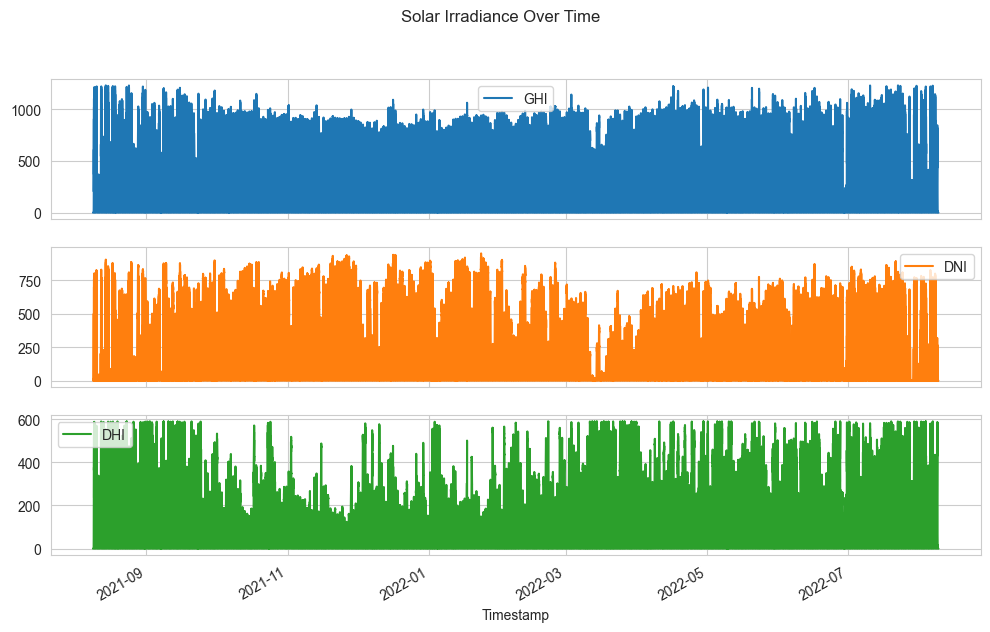

In [36]:
# Cell 5: Time Series Analysis
df_clean[['GHI', 'DNI', 'DHI']].plot(subplots=True, title='Solar Irradiance Over Time')
plt.show()

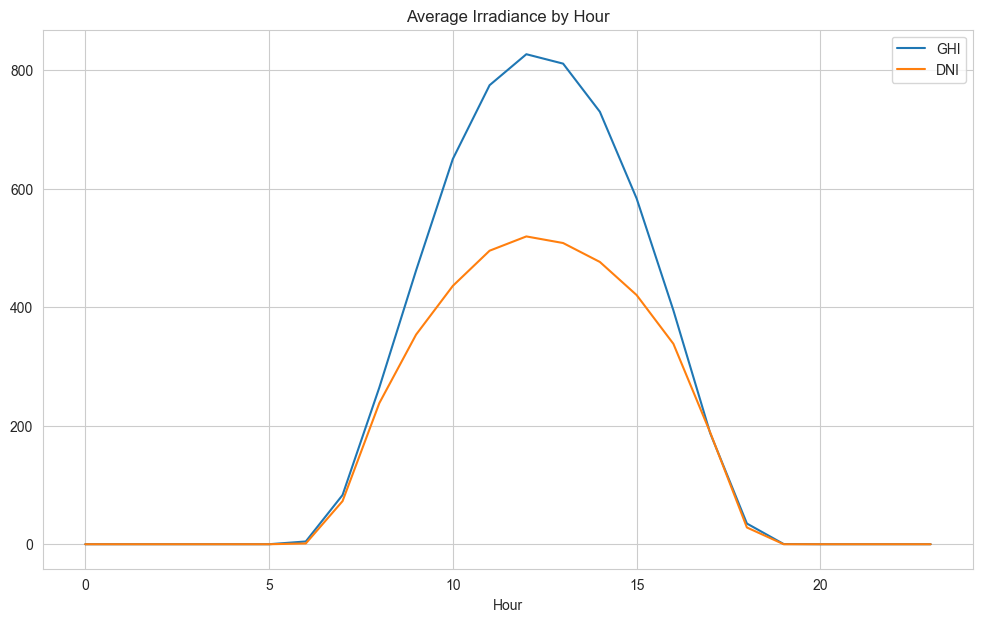

In [37]:
# Observe hourly patterns
df_clean['Hour'] = df_clean.index.hour
df_clean.groupby('Hour')[['GHI', 'DNI']].mean().plot(title='Average Irradiance by Hour')
plt.show()

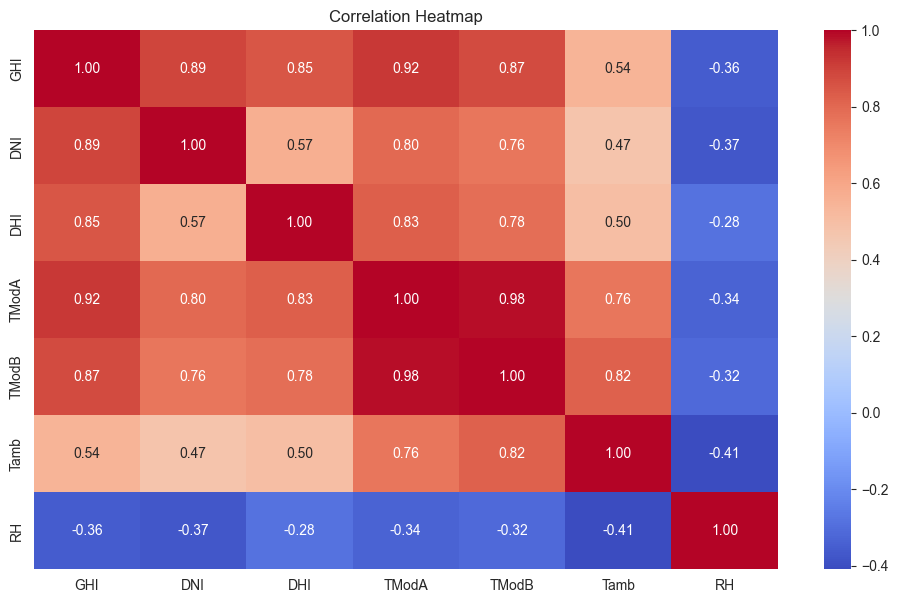

In [38]:
# Cell 6: Correlation & Relationship Analysis
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'Tamb', 'RH']
corr_matrix = df_clean[corr_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

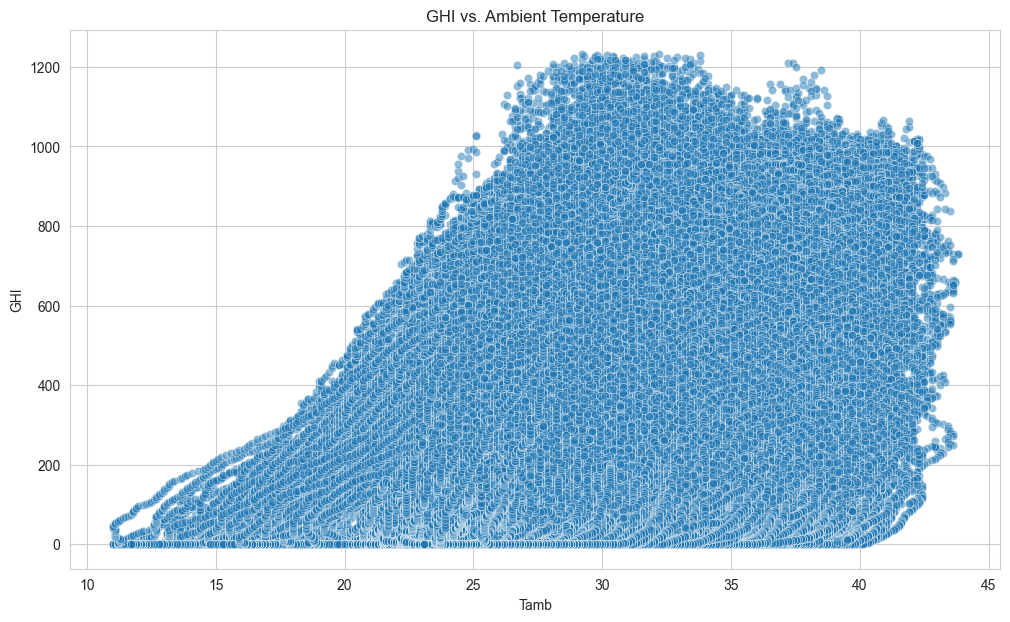

In [39]:
# Scatter plot
sns.scatterplot(x='Tamb', y='GHI', data=df_clean, alpha=0.5)
plt.title('GHI vs. Ambient Temperature')
plt.show()

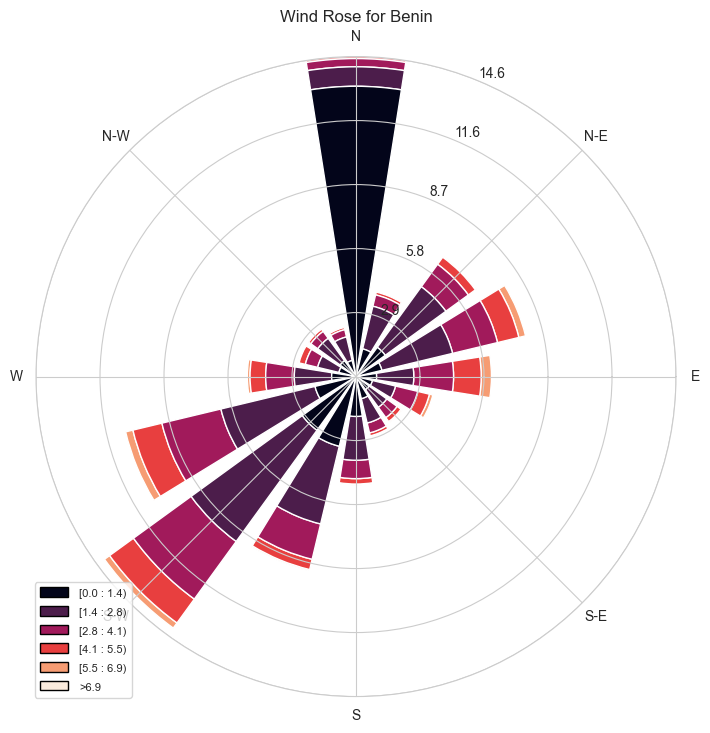

In [40]:
# Cell 7: Wind & Distribution Analysis
# Wind Rose
fig = plt.figure(figsize=(8, 8), dpi=100)
ax = WindroseAxes.from_ax(fig=fig)
ax.bar(df_clean['WD'], df_clean['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title('Wind Rose for Benin')
plt.show()

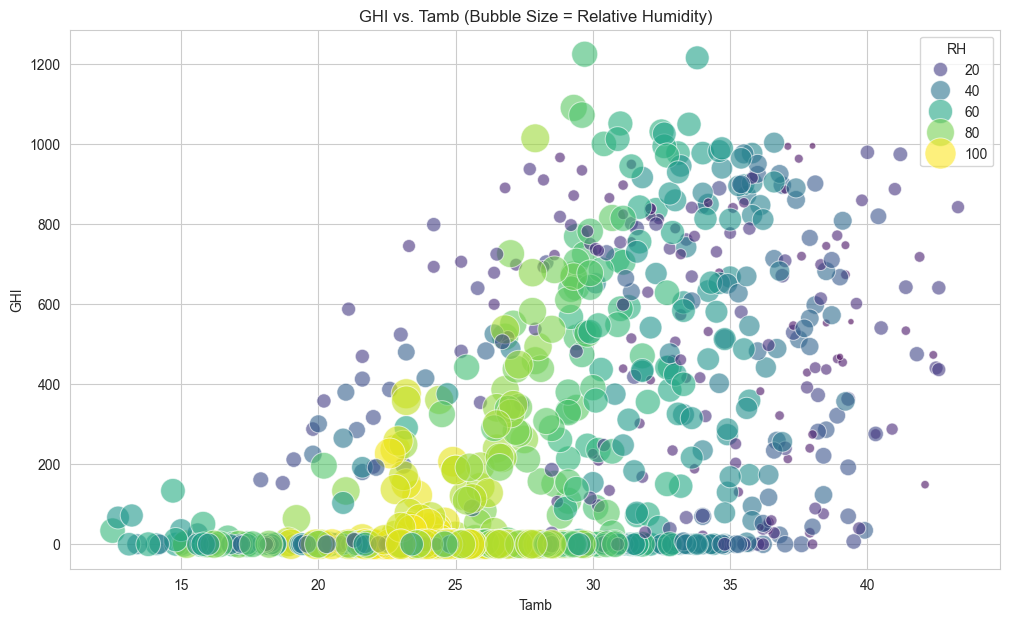

In [41]:
# Cell 8: Bubble Chart
sns.scatterplot(x='Tamb', y='GHI', size='RH', hue='RH',
                data=df_clean.sample(1000), # Use a sample for performance
                sizes=(20, 500), alpha=0.6, palette='viridis')
plt.title('GHI vs. Tamb (Bubble Size = Relative Humidity)')
plt.show()